In [2]:
import numpy as np
import matplotlib.pyplot as plt

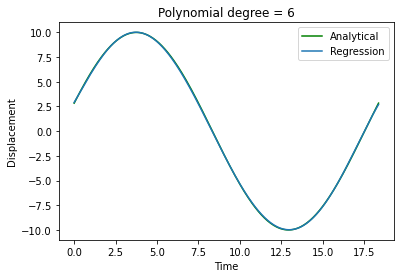

In [8]:
k = 11 #stiffness
m = 94 #mass
omega = (k/m)**0.5 
e = 0.1 #error
A = 10 #amplitude
phi = 5 #initial phase
degree = 6 #degree of polynomial
n = 300 #number of data points

#generating data for n values of x 
x_meas = np.linspace(0, 2*np.pi/omega,num = n)
y_meas = np.zeros(len(x_meas))
y_actual = np.zeros(len(x_meas))

i = 0
for x in x_meas:
    y_actual[i] = A * np.cos(omega*x + phi)
    error = np.random.uniform(-1,1) * e * y_actual[i]
    y_meas[i] = y_actual[i] + error
    i += 1

#generating x training
xTr = np.zeros(shape = (len(x_meas), degree + 1))
for i in range(0, len(x_meas)):
    for j in range(0, degree + 1):
        xTr[i][j] = x_meas[i]**j

#calculating w
# w = (((xTr)T * xTr)^-1)*(xTr)T*y_meas
w = np.matmul(np.transpose(xTr), xTr)
w = np.linalg.inv(w)
w = np.matmul(w , np.transpose(xTr))
w = np.matmul(w , y_meas)

yTr = np.dot(xTr, w)

plt.plot(x_meas,y_actual, 'g',markersize = 1, label = 'Analytical')
plt.plot(x_meas, yTr, label = 'Regression')
plt.title('Polynomial degree = ' + str(degree))
plt.ylabel('Displacement')
plt.xlabel('Time')
plt.legend()
plt.show()